# **Phishing Website Detection by Machine Learning Techniques**

*Final project of AI & Cybersecurity Course*

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

*This project is worked on Google Collaboratory.*<br>
*The required packages for this notebook are imported when needed.*

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 5.urldata.csv to 5.urldata.csv


In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltimport numpy as np
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import f_classif, SelectKBest, mutual_info_classif
import random
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
import seaborn as sn
from sklearn.naive_bayes import GaussianNB
from pycm import *
from sklearn.neighbors import KNeighborsClassifier
import numpy
import pandas
from keras.models import Sequential
import time
from keras.layers import Dense, Input, advanced_activations
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from keras.models import Model
from keras.optimizers import nadam, adam, sgd
from keras.regularizers import l1_l2
from keras.layers import Dropout
from sklearn.model_selection import KFold 
from sklearn.utils import shuffle
from keras.models import load_model
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [ ]:
import io
#Loading the data
data0 = pd.read_csv(io.BytesIO(uploaded['5.urldata.csv']))
# Dataset is now stored in a Pandas Dataframe
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## **3. Understanding the data**
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

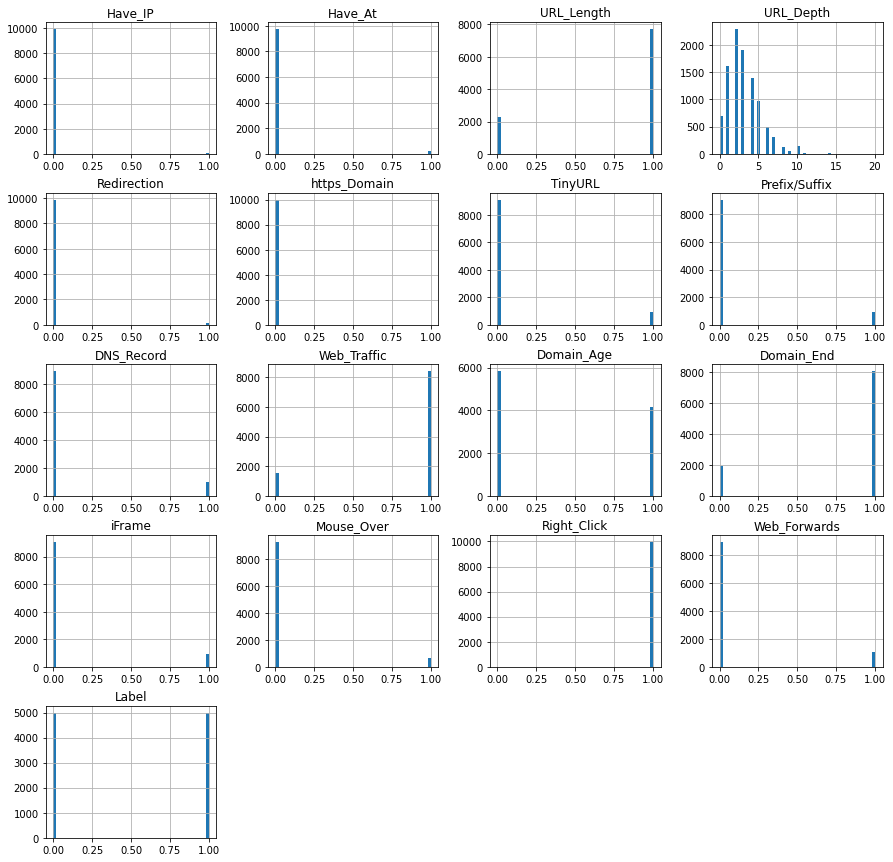

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

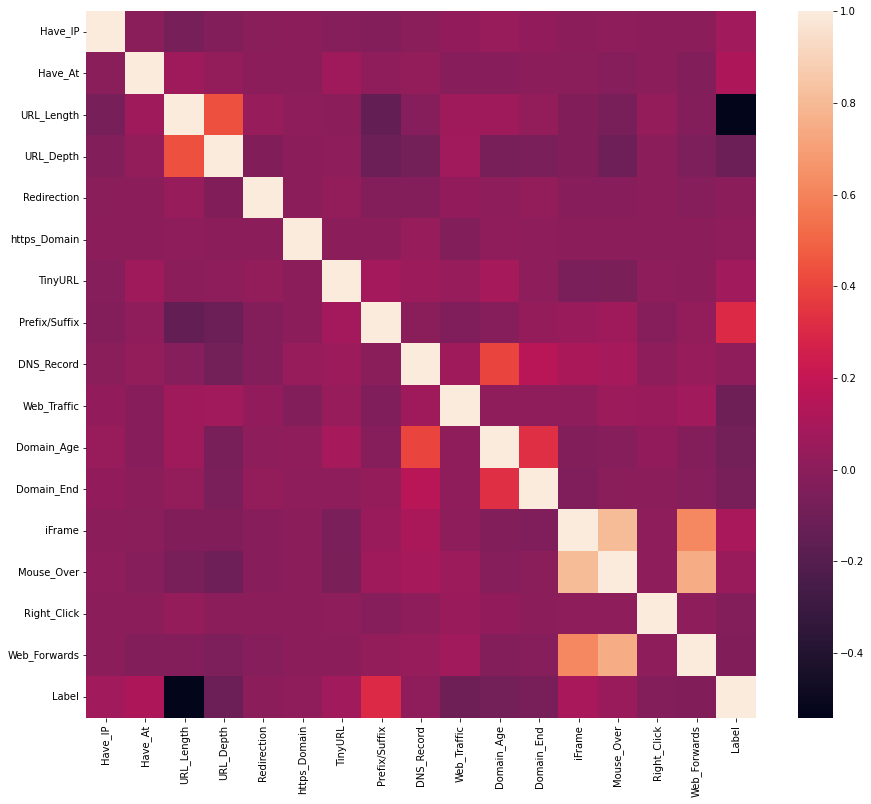

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,1,1,5,0,0,0,0,0,1,0,0,0,0,1,0,1
1,0,0,1,3,0,0,0,0,1,1,1,1,0,0,1,0,0
2,0,0,1,10,0,0,0,0,0,1,0,1,0,1,1,0,1
3,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**
 Models for classification and regression tasks frequently use decision trees. In essence, they pick up a hierarchy of if/else questions that lead to a choice. Finding the if/else set of questions that leads us to the correct solution the quickest is the key to understanding how to use a decision tree.

These inquiries are known as tests in the context of machine learning (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). The programme looks through all potential tests and selects the one that provides the most useful information about the target variable before creating a tree.

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.813
Decision Tree: Accuracy on test Data: 0.816


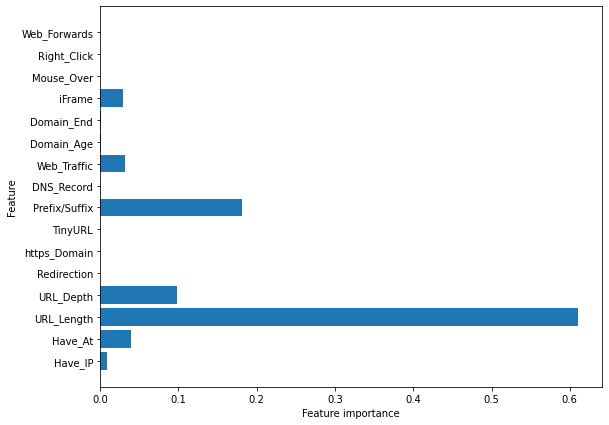

In [ ]:
#checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests are currently among the most popular machine learning techniques for classification and regression. In essence, a random forest is a group of decision trees, where each tree differs somewhat from the others. The theory behind random forests is that while each tree may make somewhat accurate predictions, it will probably overfit on some portions of the data.

By averaging the outcomes of several trees, we can lessen the degree of overfitting if they are all successful and overfit in various ways. You must choose how many trees to include in your random forest model (this is determined by the n estimators option of the RandomForestRegressor or RandomForestClassifier). They are quite effective, frequently operate well without much parameter tuning, and don't call for data scaling.

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.814
Random forest: Accuracy on test Data: 0.822


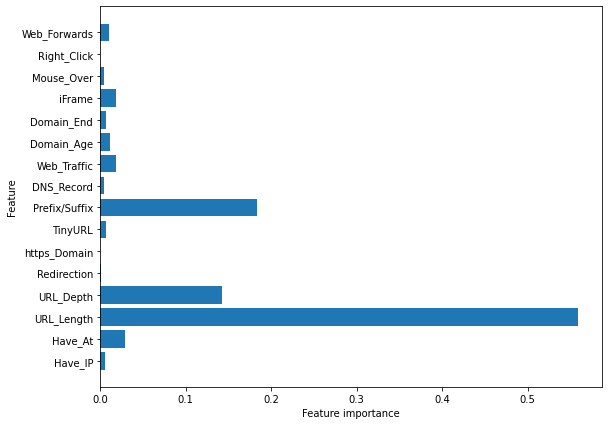

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
(Vanilla) feed-forward neural networks and occasionally just "neural networks" are other names for multilayer perceptrons (MLPs). We can use multilayer perceptrons to solve classification and regression issues.

MLPs can be thought of as generalised linear models that go through several steps of processing before making a decision.

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.864
Multilayer Perceptrons: Accuracy on test Data: 0.862


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **7.4. XGBoost Classifier**
One of the most widely used machine learning algorithms today is XGBoost. Extreme Gradient Boosting is referred to as XGBoost. Regardless of the specific regression or classification prediction problem at hand. A gradient boosted decision tree implementation created for speed and performance is called XGBoost.

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.867
XGBoost : Accuracy on test Data: 0.861


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **7.5. Autoencoder Neural Network**
An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 14)                238       
                                                                 
 dense_5 (Dense)             (None, 16)                240       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
Total params: 1,294
Trainable params: 1,294
Non-trainable par

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 [==============================] - 2s 11ms/step - loss: 3.7361 - accuracy: 0.0597 - val_loss: 3.4006 - val_accuracy: 0.0056
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 3.4599 - accuracy: 0.0030 - val_loss: 3.3409 - val_accuracy: 0.0056
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 3.4222 - accuracy: 0.0028 - val_loss: 3.3027 - val_accuracy: 0.0019
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 3.3864 - accuracy: 0.0016 - val_loss: 3.2655 - val_accuracy: 0.0019
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 3.3527 - accuracy: 0.0016 - val_loss: 3.2350 - val_accuracy: 0.0019
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 3.2846 - accuracy: 0.0016 - val_loss: 1.1379 - val_accuracy: 0.0019
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: -1.3460 - accuracy: 0.0938 - val_loss: -1.2422 - val_accuracy: 0.2956
Epo

**Performance Evaluation:**

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 2ms/step - loss: -1.6623 - accuracy: 0.0285

Autoencoder: Accuracy on training Data: 0.032
Autoencoder: Accuracy on test Data: 0.029


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### **7.6. Support Vector Machines**

Support-vector machines (SVMs, also known as support-vector networks) are supervised learning models with corresponding learning algorithms that examine data used for regression analysis and classification. An SVM training method creates a model that categorises fresh examples according to one of two categories given a series of training examples that have each been tagged as belonging to one of the categories. This makes the algorithm a non-probabilistic binary linear classifier.

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

#print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
#print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))
print("Accuracy on training Data:",acc_train_svm*100,"%")
print("Accuracy on testing Data:",acc_test_svm*100,"%")

Accuracy on training Data: 79.95 %
Accuracy on testing Data: 81.25 %


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

### **7.7. Neural Networks**

Define and intialize neural network architectures for 3 different datasets

In [ ]:
def initialize_neural_network(dataset, input_dimensions):
    
    # Model Architecture for Dataset 1
    if dataset == 1:
        model = Sequential()
        model.add(Dense(input_dimensions, input_dim=input_dimensions, kernel_initializer='normal', activation='relu',))
#         model.add(Dropout(0.3))
        model.add(Dense(50, input_dim=50, kernel_initializer='normal', activation='relu',))
#         model.add(Dropout(0.3))
        model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
        optm = nadam(lr=0.002)
        model.compile(loss='mean_squared_error', optimizer=optm, metrics=['accuracy'])


    # Model Architecture for Dataset 2
    elif dataset == 2:
        model = Sequential()
        model.add(Dense(input_dimensions, input_dim=input_dimensions, kernel_initializer='normal', activation='relu',))
#         model.add(Dropout(0.2))
        model.add(Dense(50, input_dim=50, kernel_initializer='normal', activation='relu',))
#         model.add(Dropout(0.2))
        model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
        optm = nadam(lr=0.002)
        model.compile(loss='mean_squared_error', optimizer=optm, metrics=['accuracy'])
        
    elif dataset == 3:
        model = Sequential()
        model.add(Dense(input_dimensions, input_dim=input_dimensions, kernel_initializer='normal', activation='relu',))
        # model.add(Dropout(0.2))
        model.add(Dense(50, input_dim=50, kernel_initializer='normal', activation='relu',))
        # model.add(Dropout(0.2))
        model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))
        optm = nadam(lr=0.001)
        model.compile(loss='categorical_crossentropy', optimizer=optm, metrics=['accuracy'])
        
    model.save('model.h5')
    return model

Train and evaluate neural network

In [ ]:
def train_evaluate_Neural_Network(dataset, train, train_labels, test, test_labels):
    
    kf = StratifiedKFold(n_splits=5, random_state=np.random.seed(1))
    train_accuracy = []
    test_accuracy = []
    validation_accuracy = []    
    np.random.seed(1)
    start = time.time() 
    for train_index, validation_index in kf.split(train, train_labels):
        #print("Train:", train_index, "Validation:",test_index)
        X_train, X_validation = train[train_index], train[validation_index] 
        y_train, y_validation = train_labels[train_index], train_labels[validation_index]
        
        if dataset == 3:
            encoder_train = LabelEncoder()
            encoder_train.fit(y_train)
            encoded_Y_train = encoder_train.transform(y_train)
            y_train = np_utils.to_categorical(encoded_Y_train)

            encoder_val = LabelEncoder()
            encoder_val.fit(y_validation)
            encoded_Y_val = encoder_val.transform(y_validation)
            y_validation = np_utils.to_categorical(encoded_Y_val)
        
        model = load_model('model.h5')
        model.fit(X_train, y_train, epochs=65, verbose=0)
        
        
        if dataset == 1 :
            yhat_classes = model.predict_classes(X_train, verbose=0)
            # predict crisp classes for test set
            yhat_classes = yhat_classes[:, 0]
            conf_mat = confusion_matrix(y_train, yhat_classes)
            tn, fp, fn, tp = conf_mat.ravel()
            accuracy = (tp + tn) / (tp+tn+fp+fn)
            train_accuracy.append(accuracy)
            yhat_classes = model.predict_classes(X_validation, verbose=0)
            # predict crisp classes for test set
            yhat_classes = yhat_classes[:, 0]
            validation_conf_mat = confusion_matrix(y_validation, yhat_classes)
            tn, fp, fn, tp = validation_conf_mat.ravel()
            validation_acc = (tp + tn) / (tp+tn+fp+fn)
            validation_accuracy.append(validation_acc)

        #Getting Validation Confusion Matrix
        if dataset == 2:
            
            yhat_classes = model.predict_classes(X_train, verbose=0)
            # predict crisp classes for test set
            yhat_classes = yhat_classes[:, 0]
            yhat_classes = np.where(yhat_classes == 0, -1, 1)
            conf_mat = confusion_matrix(y_train, yhat_classes)
            tn, fp, fn, tp = conf_mat.ravel()
            accuracy = (tp + tn) / (tp+tn+fp+fn)
            train_accuracy.append(accuracy)
            yhat_classes = model.predict_classes(X_validation, verbose=0)
            # predict crisp classes for test set
            yhat_classes = yhat_classes[:, 0]
            yhat_classes = np.where(yhat_classes == 0, -1, 1)
            validation_conf_mat = confusion_matrix(y_validation, yhat_classes)
            tn, fp, fn, tp = validation_conf_mat.ravel()
            validation_acc = (tp + tn) / (tp+tn+fp+fn)
            validation_accuracy.append(validation_acc)
            
        if dataset == 3:
            
            yhat_classes = model.predict_classes(X_train, verbose=0)
            yhat_classes = (encoder_train.inverse_transform(yhat_classes))
            conf_mat = ConfusionMatrix(train_labels[train_index], yhat_classes)
            fn = (conf_mat.class_stat['FN'][1]) + (conf_mat.class_stat['FN'][-1]) + (conf_mat.class_stat['FN'][0])
            tn = (conf_mat.class_stat['TN'][1]) + (conf_mat.class_stat['TN'][-1]) + (conf_mat.class_stat['TN'][0])
            fp = (conf_mat.class_stat['FP'][1]) + (conf_mat.class_stat['FP'][-1]) + (conf_mat.class_stat['FP'][0])
            tp = (conf_mat.class_stat['TP'][1]) + (conf_mat.class_stat['TP'][-1]) + (conf_mat.class_stat['TP'][0])
            accuracy = (tp + tn) / (tp+tn+fp+fn)
            train_accuracy.append(accuracy)
            
            yhat_classes = model.predict_classes(X_validation, verbose=0)
            yhat_classes = (encoder_val.inverse_transform(yhat_classes))
            validation_conf_mat = ConfusionMatrix(train_labels[validation_index], yhat_classes)
            fn = (validation_conf_mat.class_stat['FN'][1]) + (validation_conf_mat.class_stat['FN'][-1])
            + (validation_conf_mat.class_stat['FN'][0])
            tn = (validation_conf_mat.class_stat['TN'][1]) + (validation_conf_mat.class_stat['TN'][-1])
            + (validation_conf_mat.class_stat['TN'][0])
            fp = (validation_conf_mat.class_stat['FP'][1]) + (validation_conf_mat.class_stat['FP'][-1]) 
            + (validation_conf_mat.class_stat['FP'][0])
            tp = (validation_conf_mat.class_stat['TP'][1]) + (validation_conf_mat.class_stat['TP'][-1])
            + (validation_conf_mat.class_stat['TP'][0])
            validation_acc = (tp + tn) / (tp+tn+fp+fn)
            validation_accuracy.append(validation_acc)

    
    end = time.time()
    print('Time to train Neural Network on Dataset '+str(dataset)+' is: ' + str(end - start))
    if dataset == 1 or dataset == 2:
        yhat_classes_test = model.predict_classes(test, verbose=0)
        if dataset == 2:
            yhat_classes_test = np.where(yhat_classes_test == 0, -1, 1)
        test_conf_mat = confusion_matrix(test_labels, yhat_classes_test)
        tn, fp, fn, tp = test_conf_mat.ravel()
        test_acc = (tp + tn) / (tp+tn+fp+fn)
        dataset_3_confusion_mat = 0
    
    elif dataset == 3:
        encoder_test = LabelEncoder()
        encoder_test.fit(test_labels)
        encoded_Y_test = encoder_val.transform(test_labels)
        y_test = np_utils.to_categorical(encoded_Y_test)
        yhat_classes_test = model.predict_classes(test, verbose=0)
        yhat_classes_test = (encoder_test.inverse_transform(yhat_classes_test))
        test_conf_mat = ConfusionMatrix(test_labels, yhat_classes_test)
        fn = (test_conf_mat.class_stat['FN'][1]) + (test_conf_mat.class_stat['FN'][-1]) 
        + (test_conf_mat.class_stat['FN'][0])
        tn = (test_conf_mat.class_stat['TN'][1]) + (test_conf_mat.class_stat['TN'][-1]) 
        + (test_conf_mat.class_stat['TN'][0])
        fp = (test_conf_mat.class_stat['FP'][1]) + (test_conf_mat.class_stat['FP'][-1]) 
        + (test_conf_mat.class_stat['FP'][0])
        tp = (test_conf_mat.class_stat['TP'][1]) + (test_conf_mat.class_stat['TP'][-1]) 
        + (test_conf_mat.class_stat['TP'][0])
        test_acc = (tp + tn) / (tp+tn+fp+fn)
        
        dataset_3_confusion_mat = (confusion_matrix(test_labels, yhat_classes_test))
        
    
    return train_accuracy, validation_accuracy, test_acc, test_conf_mat, dataset_3_confusion_mat



## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.813,0.816
1,Random Forest,0.814,0.822
2,Multilayer Perceptrons,0.864,0.862
3,XGBoost,0.867,0.861
4,AutoEncoder,0.032,0.029
5,SVM,0.800,0.812


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.864,0.862
3,XGBoost,0.867,0.861
1,Random Forest,0.814,0.822
0,Decision Tree,0.813,0.816
5,SVM,0.800,0.812
4,AutoEncoder,0.032,0.029


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

**Testing the saved model:**

In [ ]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(learning_rate=0.4, max_depth=7, missing=nan)

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/